# Interactive clustering and annotation of VAE_all/MPPleiden experiment

This notebook creates the clusterings of MPP data at different resolutions: `clustering_res0.2.npy`, `clustering_res0.4.npy`, `clustering_res0.8.npy`, `clustering_res1.2.npy`, `clustering_res1.6.npy`, `clustering_res2.0.npy`

In [11]:
from campa.constants import campa_config
from campa.tl import Experiment
from campa.tl import (
    Cluster,
    Experiment,
    get_clustered_cells,
    load_full_data_dict,
    add_clustering_to_adata,
)
from campa.pl import annotate_img
import os
import numpy as np
import scanpy as sc

In [12]:
exp_name = 'VAE_all/MPPleiden'
cluster_data_dir = os.path.join(exp_name, 'aggregated/sub-0.001')

## Cluster data

In [13]:
# load cl
cl = Cluster.from_cluster_data_dir(cluster_data_dir)
# get adata object
adata = cl.cluster_mpp.get_adata(X='mpp', obsm={'X_umap': 'umap'})

/Users/hannah.spitzer/opt/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [9]:
sc.pp.neighbors(adata)
for res in [0.2, 0.4, 0.6, 0.8, 1.2, 1.6, 2.0]:
    sc.tl.leiden(adata, resolution=res, key_added=f'clustering_res{res:.1f}', random_state=0)
    # write clustering to disk
    np.save(os.path.join(campa_config.EXPERIMENT_DIR, cluster_data_dir, f'clustering_res{res:.1f}'), adata.obs[f'clustering_res{res:.1f}'])

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


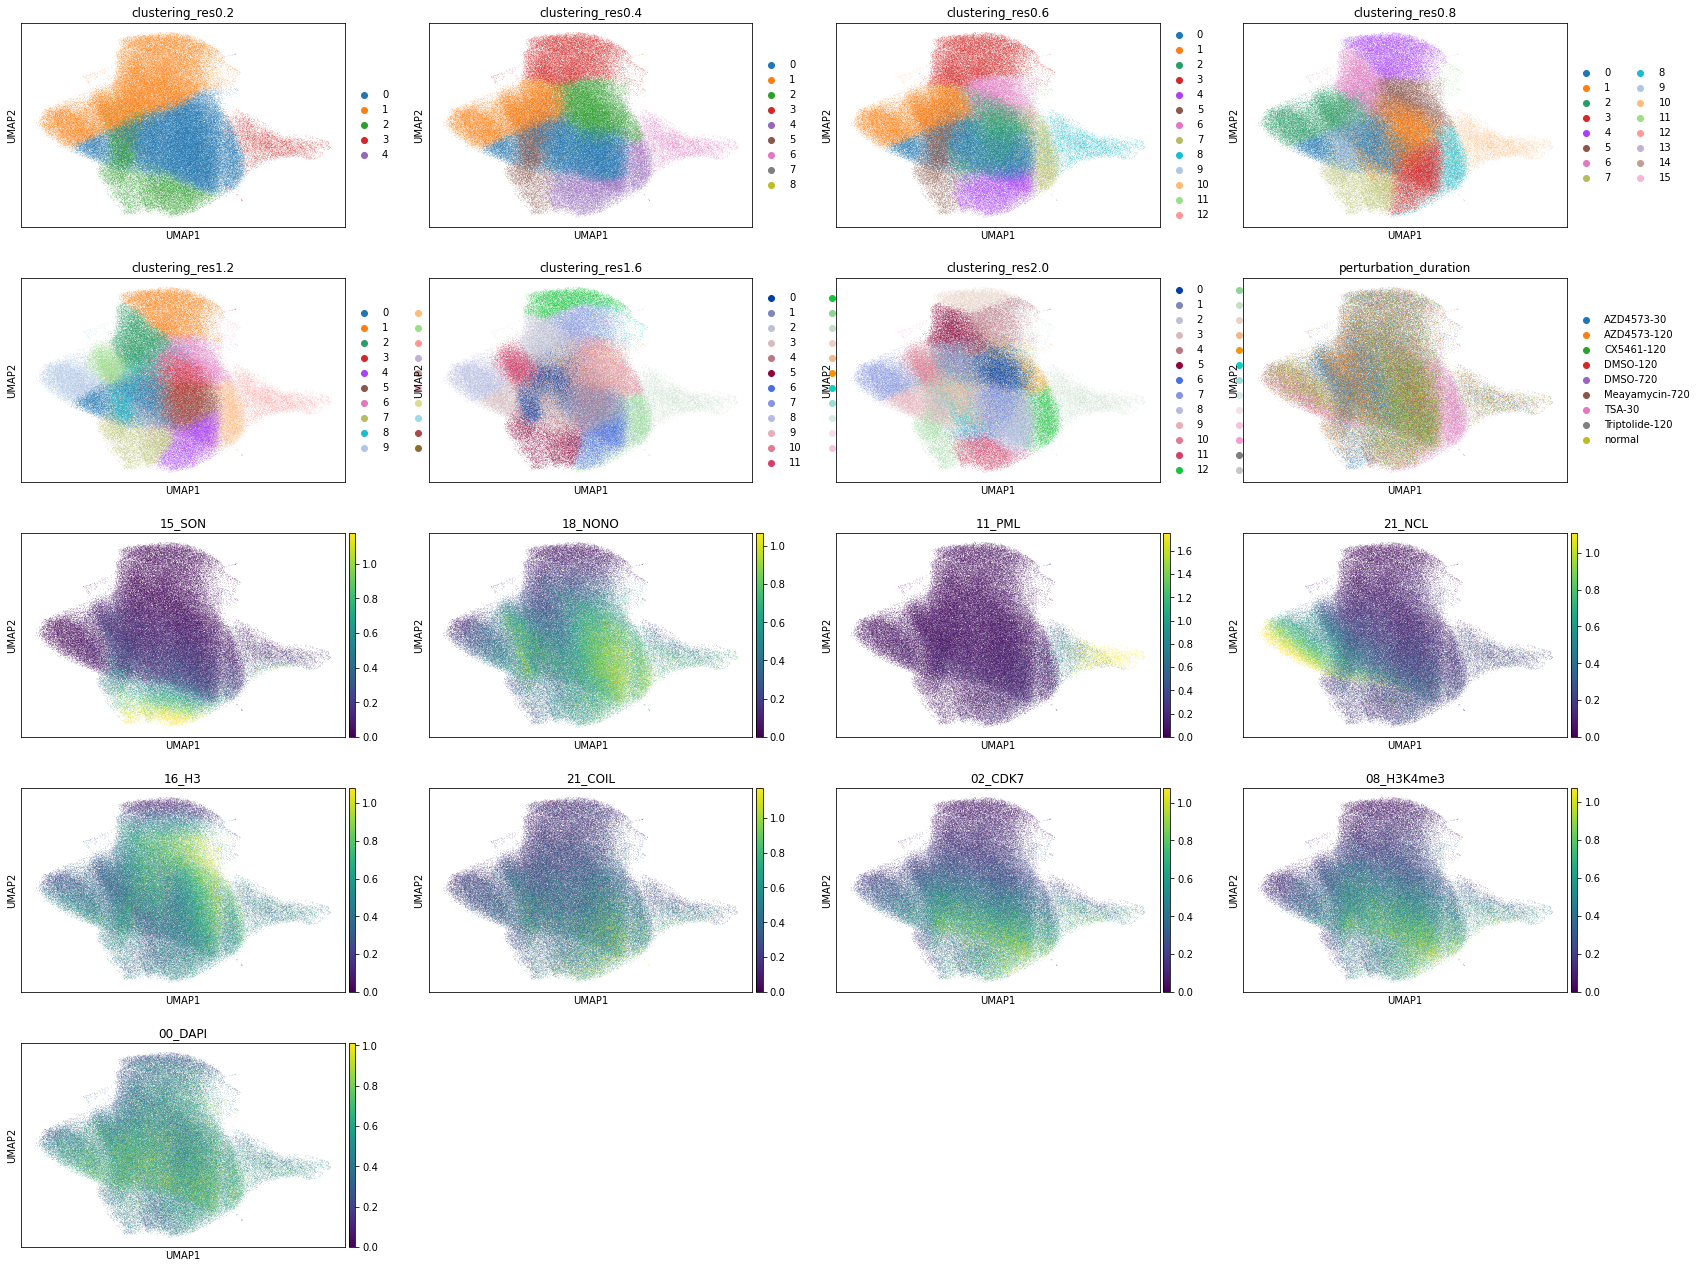

In [10]:
sc.pl.umap(adata, color=[f'clustering_res{res:.1f}' for res in [0.2, 0.4, 0.6, 0.8, 1.2, 1.6, 2.0]] + ['perturbation_duration', '15_SON', '18_NONO', 
                         '11_PML', '21_NCL',
                         '16_H3', '21_COIL',
                         '02_CDK7','08_H3K4me3',
                         '00_DAPI'
                        ], vmax='p99')

## Explore clustered data

In [14]:
# comment in for logging messages
#import logging
#logging.basicConfig(level=logging.INFO)

In [15]:
# quick plotting functions for looking at results
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_loadings(adata,var='clustering'):
    pixel_values_annotated = pd.concat([
        pd.DataFrame(adata.X,columns=adata.var_names).reset_index(drop=True),
        adata.obs[[var]].reset_index(drop=True)],
        axis=1)
    #col_standard = sns.clustermap(pixel_values_annotated.groupby(var).aggregate('mean'), z_score=0, cmap="vlag", figsize=[10,4],vmin=-3, vmax=3)
    row_standard = sns.clustermap(pixel_values_annotated.groupby(var).aggregate('mean'), z_score=1, cmap="vlag", figsize=[14,9],vmin=-3, vmax=3, method='ward')


In [16]:
# load cl
cl = Cluster.from_cluster_data_dir(cluster_data_dir)
# get adata object
adata = cl.cluster_mpp.get_adata(X='mpp', obsm={'X_umap': 'umap'})

/Users/hannah.spitzer/opt/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [17]:
# add clustering and colormap (from cluster_name_annotation.csv) to adata
cl.set_cluster_name('clustering_res0.4') 
add_clustering_to_adata(os.path.join(campa_config.EXPERIMENT_DIR, cluster_data_dir), 'clustering_res0.4', adata, cl.cluster_annotation)


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res0.4.npy


/Users/hannah.spitzer/opt/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'plate_name' as categorical
/Users/hannah.spitzer/opt/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'well_name' as categorical
/Users/hannah.spitzer/opt/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in

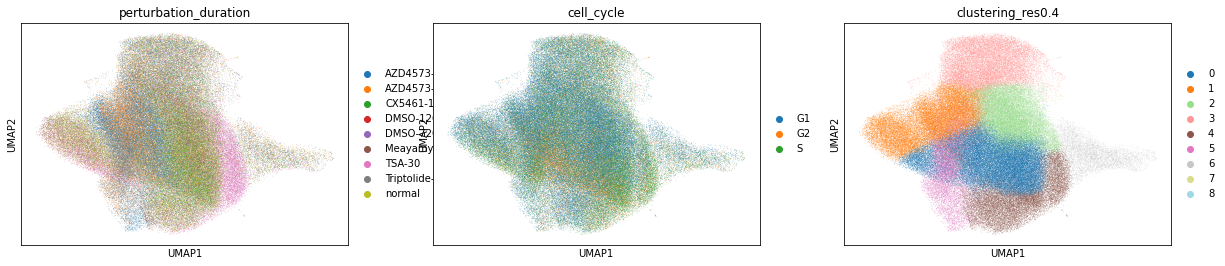

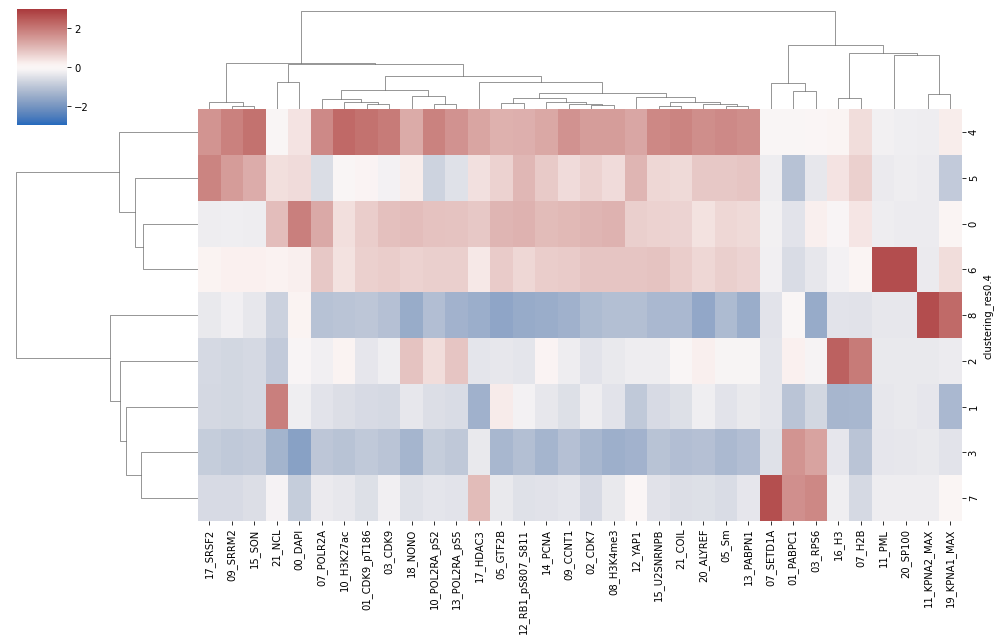

In [18]:
plt.rcParams['figure.figsize'] = [6, 4]
sc.pl.umap(adata, color=['perturbation_duration', 'cell_cycle', 'clustering_res0.4'], vmax='p99')

plot_loadings(adata, 'clustering_res0.4')

In [19]:
# NOTE: this may take a couple of minutes
# load data
exp = Experiment.from_dir(exp_name)
mpp_datas = load_full_data_dict(exp, keys=['x', 'y', 'obj_ids', 'mpp'])
# project clustering to some example cells
example_cells = {}
example_cells.update(get_clustered_cells(mpp_datas, cl, 'clustering_res0.4', num_objs=5))

184A1_unperturbed/I09
184A1_unperturbed/I11
184A1_unperturbed/J10
184A1_unperturbed/J12
184A1_DMSO/I14
184A1_DMSO/J16
184A1_AZD4573/I13
184A1_AZD4573/I17
184A1_AZD4573/J14
184A1_AZD4573/J18
184A1_AZD4573/J21
184A1_CX5461/I18
184A1_CX5461/J09
184A1_CX5461/J22
184A1_TSA/I16
184A1_TSA/J13
184A1_TSA/J20
184A1_triptolide/I10
184A1_triptolide/J15
184A1_meayamycin/I12
184A1_meayamycin/I20
184A1_unperturbed/I09
184A1_unperturbed/I11
184A1_unperturbed/J10
184A1_unperturbed/J12
184A1_DMSO/I14
184A1_DMSO/J16
184A1_AZD4573/I13
184A1_AZD4573/I17
184A1_AZD4573/J14
184A1_AZD4573/J18
184A1_AZD4573/J21
184A1_CX5461/I18
184A1_CX5461/J09
184A1_CX5461/J22
184A1_TSA/I16
184A1_TSA/J13
184A1_TSA/J20
184A1_triptolide/I10
184A1_triptolide/J15
184A1_meayamycin/I12
184A1_meayamycin/I20


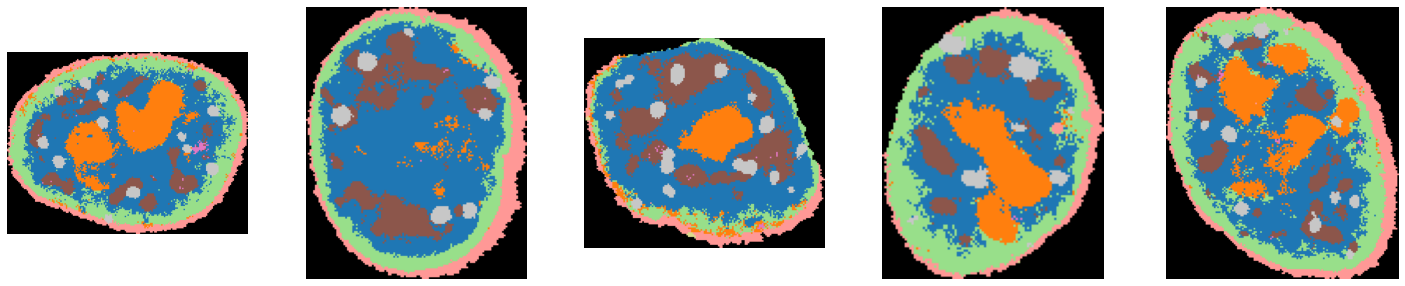

In [20]:
# plot example cells
data_dir = '184A1_unperturbed/I09'
fig, axes = plt.subplots(1,5, figsize=(25,5), squeeze=False)
for i in range(5):
    axes[0,i].imshow(example_cells['clustering_res0.4_colored'][data_dir][i])
for ax in axes.flat:
    ax.axis('off')